In [1]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import shap

# np.random.seed(1)

In [2]:
df = pd.read_csv('data/heart.csv')
X = df.drop(['target'],axis=1)
y = df['target']

train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [3]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2
360,48,1,0,122,222,0,0,186,0,0.0,2,0,2
717,56,1,2,130,256,1,0,142,1,0.6,1,1,1
271,44,1,1,120,263,0,1,173,0,0.0,2,0,3
846,35,0,0,138,183,0,1,182,0,1.4,2,0,2


In [4]:
# Fitting a RF classifier
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(train, labels_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [5]:
y_pred = rf.predict(test)
print("Accuracy: ", accuracy_score(labels_test, y_pred))

Accuracy:  1.0


In [6]:
# SHAP explanations
explainer = shap.KernelExplainer(rf.predict, shap.kmeans(train, 10))
nb_points_explain = round(0.2*train.shape[0])
shap_values = explainer(train.iloc[0:nb_points_explain, :])

  0%|          | 0/164 [00:00<?, ?it/s]

In [7]:
ref = explainer.expected_value
print("Average predicted output: ",ref)

Average predicted output:  0.5


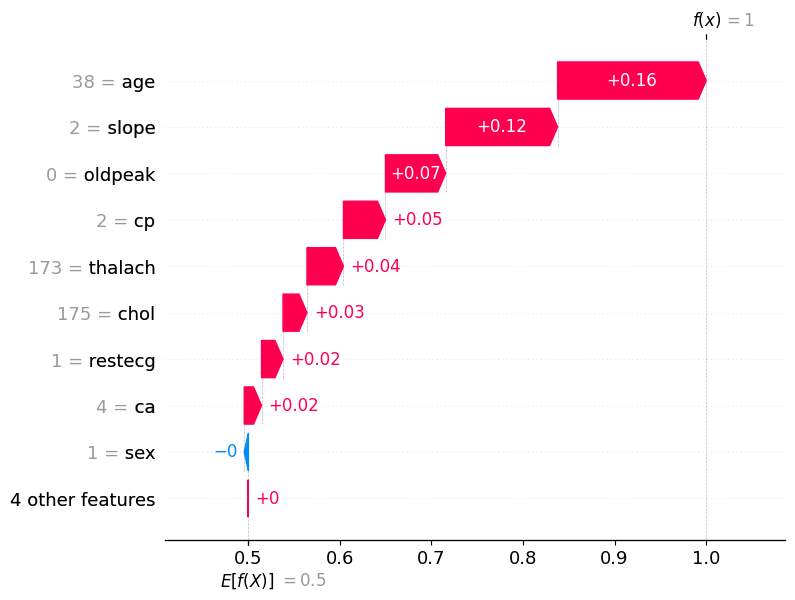

In [8]:
# Waterfall plot for a single explanation
i = 0
shap.plots.waterfall(shap_values[i])

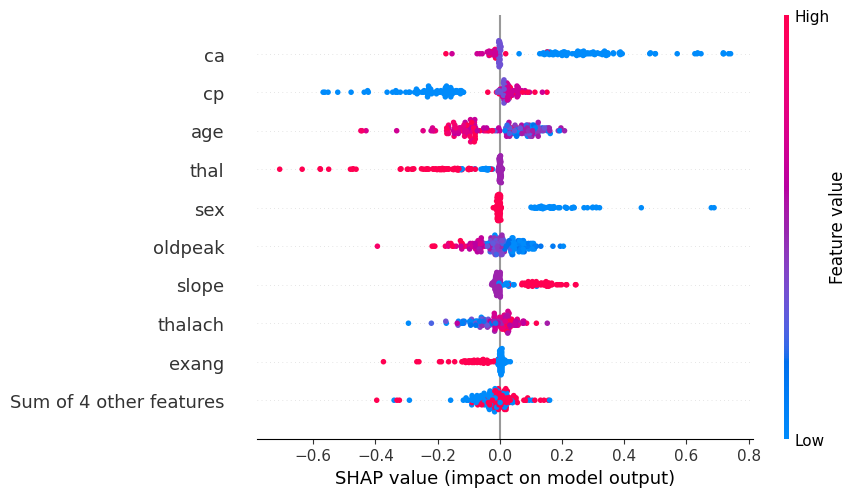

In [9]:
# Beeswarm (aka summary plot)
shap.plots.beeswarm(shap_values)

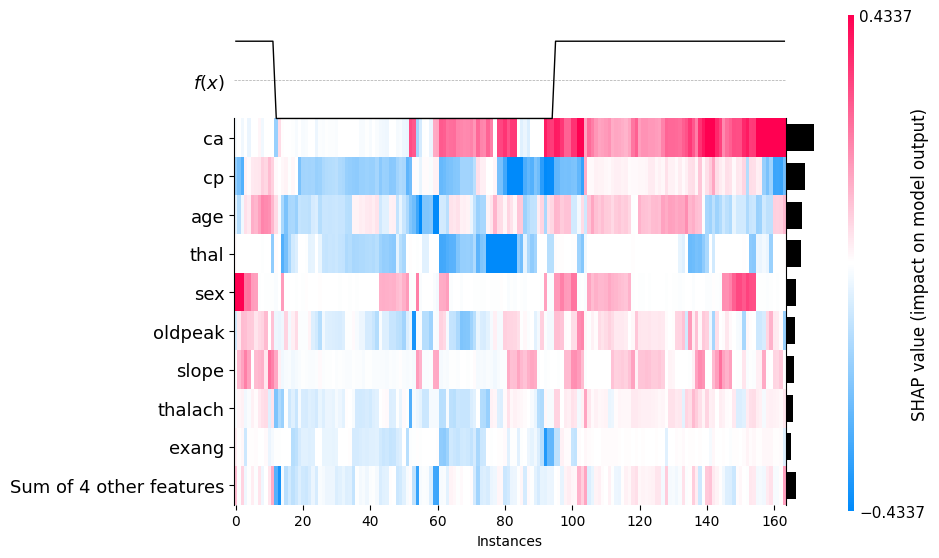

<Axes: xlabel='Instances'>

In [10]:
# Heatmap
shap.plots.heatmap(shap_values)

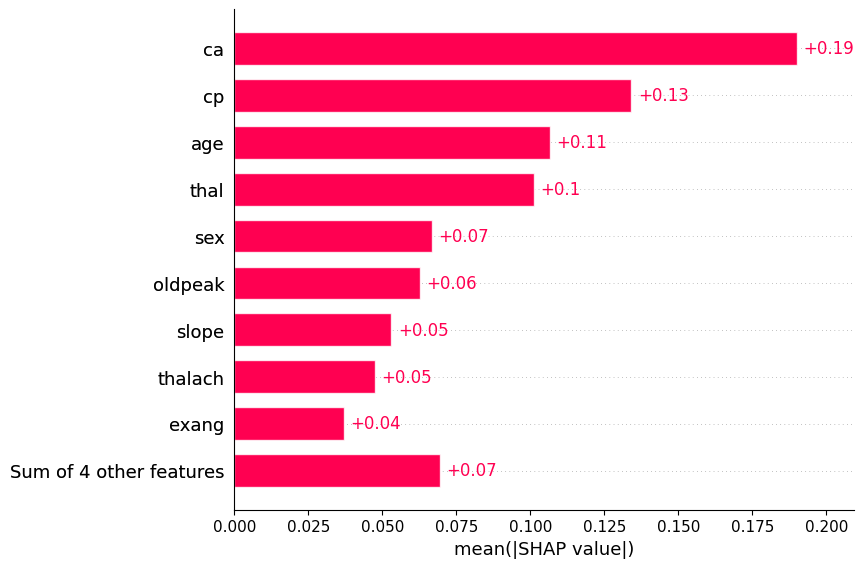

In [11]:
shap.plots.bar(shap_values)

### 